# Read data

In [10]:
import pandas as pd
df = pd.read_csv('../Dataset/dataset.csv', encoding='utf-8')
df.head()

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN


In [11]:
df.comment.value_counts()

Chất lượng sản phẩm tuyệt vời.                                                         536
Đóng gói sản phẩm rất đẹp và chắc chắn.                                                289
Thời gian giao hàng rất nhanh.                                                         251
Rất đáng tiền.                                                                         214
Shop phục vụ rất tốt.                                                                  190
                                                                                      ... 
Giao sai màu.                                                                           1
Dùng hiện tại thấy oke.                                                                  1
Nhug giá rất mềm.                                                                        1
Chất vải đẹp, giá cả phải chăng.                                                         1
áo rất ok nhé , vải mịn , len cao cổ này phối form mùa đông thì quá chất m.ng nhé !      1

<Axes: >

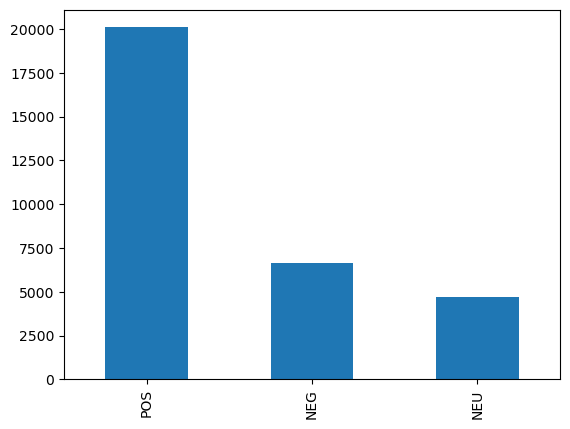

In [12]:
import matplotlib

df.label.value_counts()
df.label.value_counts().plot(kind='bar')

# Naive Bayes

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

count_vec = CountVectorizer()
bow = count_vec.fit_transform(df['comment'])
bow = np.array(bow.todense())

X, y = bow, df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

# Test with new data
test_df = pd.DataFrame(columns=['text'])
test_df.loc[0] = ['san pham chan qua']
test_df.loc[1] = ['noi chung cung duoc']
test_df.loc[2] = ['san pham rat tot']

test_data = count_vec.transform(test_df['text'])
test_data = np.array(test_data.todense())

print(test_data)

print(gnb.predict(test_data))


Number of mislabeled points out of a total 9438 points : 7481
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['NEU' 'NEU' 'NEG']


# Multinomial Naive Bayes

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB

count_vec = CountVectorizer()
bow = count_vec.fit_transform(df['comment'])
bow = np.array(bow.todense())

X, y = bow, df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mnb = MultinomialNB()  
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

# Create a test data
test_df = pd.DataFrame(columns=['text'])
test_df.loc[0] = ['san pham chan qua']
test_df.loc[1] = ['noi chung cung duoc']
test_df.loc[2] = ['san pham rat tot']

test_data = count_vec.transform(test_df['text'])
test_data = np.array(test_data.todense())

print(mnb.predict(test_data))

Number of mislabeled points out of a total 9438 points : 2571
['NEG' 'NEU' 'POS']


# SVM

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X, y = df['comment'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

labels = list(y_train.unique())
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

print('------------------')
print(len(labels))
print('------------------')
print(labels)
print('------------------')
print(label2id)
print('------------------')
print(id2label)

------------------
3
------------------
['POS', 'NEG', 'NEU']
------------------
{'POS': 0, 'NEG': 1, 'NEU': 2}
------------------
{0: 'POS', 1: 'NEG', 2: 'NEU'}


In [16]:
train_target = [label2id[x] for x in y_train]
test_target = [label2id[x] for x in y_test]

print("#training size", len(X_train))
print("#testing size", len(X_test))

#training size 22022
#testing size 9438


In [17]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
ngram_range = (1,2)
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=ngram_range)),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', svm.LinearSVC()),
])

In [18]:
text_clf.fit(X_train, train_target)

new_comments = ['san pham chan qua',
            'noi chung cung duoc',
            'san pham rat tot']

predicted = text_clf.predict(new_comments)
for _comment, label in zip(new_comments, predicted):
    print('%r => %s' % (_comment, id2label[label]))

'san pham chan qua' => NEG
'noi chung cung duoc' => POS
'san pham rat tot' => POS


In [19]:
# LinearSVC (1, 2) tfidf (5452, 32693)  ==> accurracy 0.9
predicted = text_clf.predict(X_test)
ncorrect = sum([y_pred == y for y_pred, y in zip (predicted, test_target)])
accurracy = ncorrect / len(test_target)
accurracy

0.7759059122695486